<a href="https://colab.research.google.com/github/phanisivani03/Breast-Cancer-Survival-Prediction/blob/main/Breast_Cancer_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
brcp_data = pd.read_csv('cancer_data.csv',low_memory=False)

In [ ]:
brcp_data.shape

(1904, 31)

In [ ]:
brcp_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [ ]:
brcp_data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

In [ ]:
brcp_data = brcp_data.drop(['patient_id'],axis=1)

In [ ]:
print(brcp_data.isnull().sum())

age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therapy                       0
3-gene_class

In [ ]:
brcp_data = brcp_data.dropna()

In [ ]:
brcp_data.shape

(1092, 30)

In [ ]:
brcp_data['death_from_cancer'].value_counts()

Living                  484
Died of Disease         370
Died of Other Causes    238
Name: death_from_cancer, dtype: int64

<Axes: xlabel='death_from_cancer', ylabel='count'>

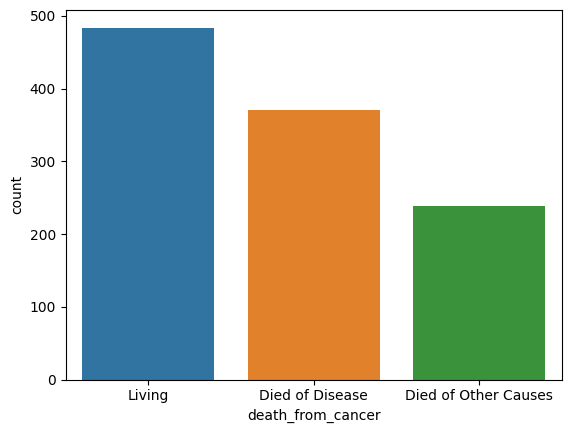

In [ ]:
sns.countplot(data=brcp_data, x='death_from_cancer')

In [ ]:
counts = brcp_data['death_from_cancer'].value_counts().values
print('Percentage of each class is: ', counts*100/np.sum(counts))

Percentage of each class is:  [44.32234432 33.88278388 21.79487179]


In [ ]:
binary_counts = (brcp_data['death_from_cancer'] !='Living').value_counts().values
print('Percentage of binary classes are: ', binary_counts*100/np.sum(binary_counts))

Percentage of binary classes are:  [55.67765568 44.32234432]


In [ ]:
binary_counts = brcp_data['overall_survival'].value_counts()
print('Percentage of binary classes are: ', binary_counts*100/np.sum(binary_counts))

Percentage of binary classes are:  0    55.677656
1    44.322344
Name: overall_survival, dtype: float64


In [ ]:
brcp_data['overall_survival'].value_counts()

0    608
1    484
Name: overall_survival, dtype: int64

<Axes: xlabel='overall_survival', ylabel='count'>

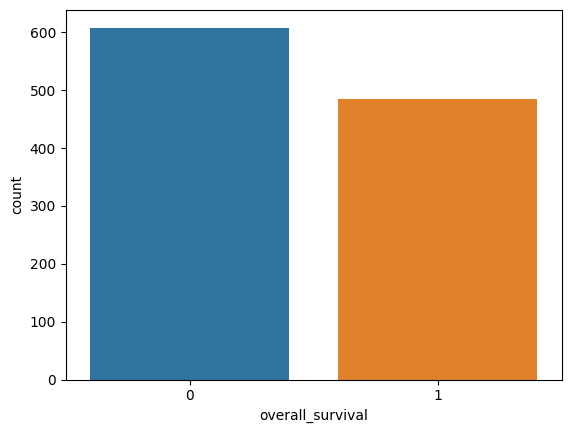

In [ ]:
sns.countplot(data=brcp_data, x='overall_survival', label="count")

In [ ]:
brcp_data= brcp_data.sample(frac=1)
Dead_data = brcp_data.loc[brcp_data['overall_survival'] == 0][:484]
Alive_data = brcp_data[brcp_data['overall_survival'] == 1]

normal_data = pd.concat([Dead_data, Alive_data])

new_data = normal_data.sample(frac=1, random_state=42)

new_data.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
151,62.70,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,Positive,...,4.022,IDC,86.133333,1,Positive,1,ER+/HER2- High Prolif,11.0,1.0,Living
1618,71.22,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,0,LumA,5,Positve,Positive,...,5.060,MDLC,85.000000,0,Positive,0,ER+/HER2- Low Prolif,30.0,2.0,Died of Other Causes
394,33.80,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumA,1,Positve,Positive,...,5.080,IDC,79.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
887,67.03,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,LumA,3,Positve,Positive,...,5.050,MDLC,318.200000,1,Positive,1,ER+/HER2- Low Prolif,25.0,2.0,Living
1282,71.40,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,0,LumA,3,Positve,Positive,...,3.060,MDLC,153.300000,0,Negative,0,ER+/HER2- Low Prolif,30.0,2.0,Died of Other Causes


Distribution of the Classes in the subsample dataset
0    0.628099
1    0.500000
Name: overall_survival, dtype: float64


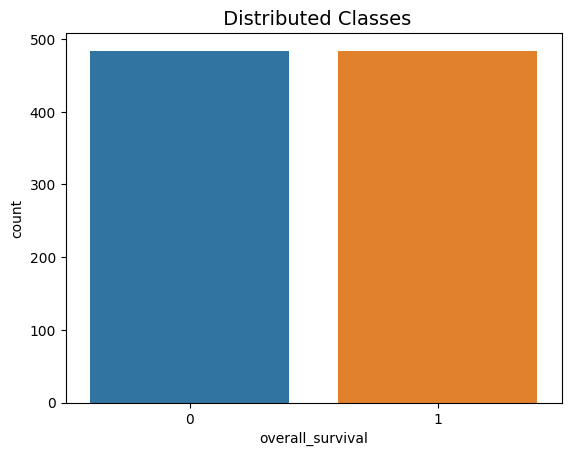

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(brcp_data['overall_survival'].value_counts()/len(new_data))

sns.countplot(data=new_data, x='overall_survival', label="count")
plt.title(' Distributed Classes', fontsize=14)
plt.show()

In [ ]:
new_data['overall_survival'].value_counts()

1    484
0    484
Name: overall_survival, dtype: int64

In [ ]:
new_data.corr()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
age_at_diagnosis,1.000000,-0.401742,0.041218,-0.092722,0.293918,0.030205,0.054549,-0.022916,-0.155496,-0.295638,-0.072773,0.064744,0.085856
chemotherapy,-0.401742,1.000000,-0.234694,0.294493,-0.108994,0.307097,-0.111336,0.461911,-0.163482,0.044811,0.223587,0.242281,0.371642
cohort,0.041218,-0.234694,1.000000,0.006852,-0.255846,-0.118163,0.304302,-0.098432,0.204130,-0.202371,-0.147869,-0.055701,-0.127404
neoplasm_histologic_grade,-0.092722,0.294493,0.006852,1.000000,-0.008539,0.160889,0.035594,0.719590,-0.097073,-0.076090,0.146661,0.135393,0.170744
hormone_therapy,0.293918,-0.108994,-0.255846,-0.008539,1.000000,0.138987,-0.150495,0.191279,-0.146313,-0.029703,0.065618,0.130266,0.236648
lymph_nodes_examined_positive,0.030205,0.307097,-0.118163,0.160889,0.138987,1.000000,-0.067988,0.609643,-0.249748,-0.162765,0.132991,0.317809,0.449746
mutation_count,0.054549,-0.111336,0.304302,0.035594,-0.150495,-0.067988,1.000000,-0.021188,0.068686,-0.139385,-0.107502,0.015199,-0.045691
nottingham_prognostic_index,-0.022916,0.461911,-0.098432,0.719590,0.191279,0.609643,-0.021188,1.000000,-0.243093,-0.154386,0.217529,0.328882,0.566748
overall_survival_months,-0.155496,-0.163482,0.204130,-0.097073,-0.146313,-0.249748,0.068686,-0.243093,1.000000,0.404424,-0.046959,-0.202676,-0.261463
overall_survival,-0.295638,0.044811,-0.202371,-0.076090,-0.029703,-0.162765,-0.139385,-0.154386,0.404424,1.000000,0.106099,-0.162342,-0.132058


Text(0, 0.5, 'Count')

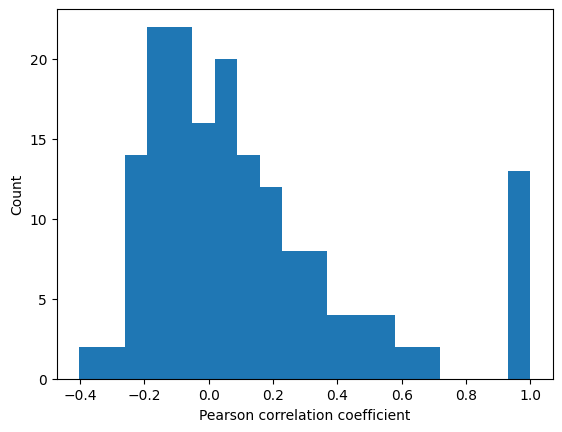

In [ ]:
# Find correaltion between features
corrMat = new_data.corr().values
plt.hist(corrMat.flatten(),20)
plt.xlabel('Pearson correlation coefficient')
plt.ylabel('Count')

In [ ]:
q1,q2 = np.percentile(corrMat.flatten(), [25 ,75])
print(q1,q2)

-0.1113361953514796 0.24228128459452825


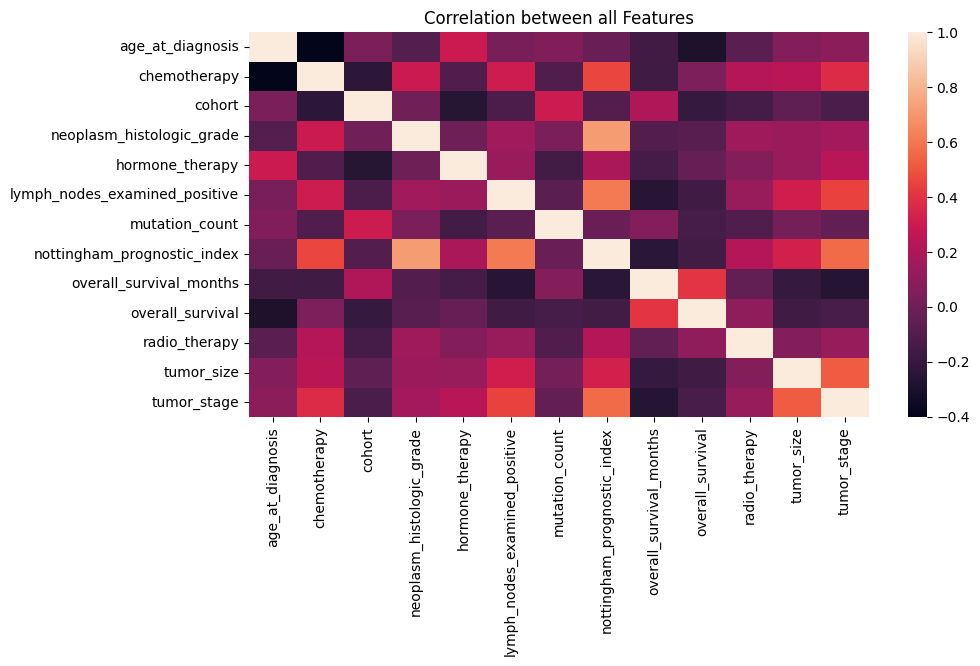

In [ ]:
fig, axs = plt.subplots(figsize = (10, 5))
sns.heatmap(new_data.corr())
plt.title('Correlation between all Features')
plt.show()

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 151 to 1392
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age_at_diagnosis                968 non-null    float64
 1   type_of_breast_surgery          968 non-null    object 
 2   cancer_type                     968 non-null    object 
 3   cancer_type_detailed            968 non-null    object 
 4   cellularity                     968 non-null    object 
 5   chemotherapy                    968 non-null    int64  
 6   pam50_+_claudin-low_subtype     968 non-null    object 
 7   cohort                          968 non-null    int64  
 8   er_status_measured_by_ihc       968 non-null    object 
 9   er_status                       968 non-null    object 
 10  neoplasm_histologic_grade       968 non-null    float64
 11  her2_status_measured_by_snp6    968 non-null    object 
 12  her2_status                     9

In [ ]:
new_data.describe

<bound method NDFrame.describe of       age_at_diagnosis type_of_breast_surgery    cancer_type  \
151              62.70      BREAST CONSERVING  Breast Cancer   
1618             71.22             MASTECTOMY  Breast Cancer   
394              33.80             MASTECTOMY  Breast Cancer   
887              67.03      BREAST CONSERVING  Breast Cancer   
1282             71.40             MASTECTOMY  Breast Cancer   
...                ...                    ...            ...   
447              73.46             MASTECTOMY  Breast Cancer   
1621             75.62             MASTECTOMY  Breast Cancer   
76               62.72      BREAST CONSERVING  Breast Cancer   
539              50.38             MASTECTOMY  Breast Cancer   
1392             72.23             MASTECTOMY  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
151            Breast Invasive Ductal Carcinoma        High             0   
1618  Breast Mixed Ductal and Lobular Carci

In [ ]:
new_data.shape

(968, 30)

In [ ]:
def mydistplot(variable, data):
    labelsize = 12
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize=labelsize)
    plt.rc('ytick', labelsize=labelsize)
    plt.rc('axes', labelsize=labelsize)

    (fig, axs) = plt.subplots(1, 1)
    plt.subplots_adjust(hspace=.3)
    class_1 = data[data['overall_survival'] == 1][variable]
    class_2 = data[data['overall_survival'] == 0][variable]
    sns.distplot(class_1, label='Survived', color='k', ax=axs, norm_hist=True)
    sns.distplot(class_2, label='Died', color='r', ax=axs, norm_hist=True)
    axs.set_xlabel(variable)
    axs.set_ylabel('Density')
    axs.legend(loc=2, prop={'size': 12})
    plt.show()

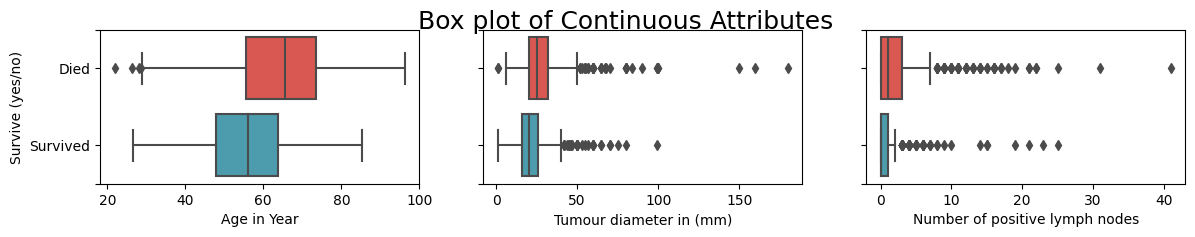

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(14,2), sharey=True)
color = 'Spectral'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]

sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=brcp_data, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=brcp_data, ax=ax[1], palette = two_colors, saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=brcp_data, ax=ax[2], palette = two_colors, saturation=0.90)

fig.suptitle('Box plot of Continuous Attributes', fontsize = 18)
plt.yticks([-0.5, 0, 1, 1.5], ['','Died', 'Survived',''])
ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Survive (yes/no)')

ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')

ax[2].set_xlabel('Number of positive lymph nodes')
ax[2].set_ylabel('')

plt.show()

In [ ]:
# therapies

chemo = new_data[(new_data['chemotherapy']==1) & (new_data['hormone_therapy']==0) & (new_data['radio_therapy']==0)]
hormone = new_data[(new_data['chemotherapy']==0) & (new_data['hormone_therapy']==1) & (new_data['radio_therapy']==0)]
radio = new_data[(new_data['chemotherapy']==0) & (new_data['hormone_therapy']==0) & (new_data['radio_therapy']==1)]

In [ ]:
c = chemo['overall_survival'].value_counts()
h = hormone['overall_survival'].value_counts()
r = radio['overall_survival'].value_counts()

print('Success rate of chemo:{} out of {} Trials'.format(c[1]/sum(c),sum(c)))
print('Success rate of hormone therapy:{}out of {} Trials'.format(h[1]/sum(h),sum(h)))
print('Success rate of radio therapy:{} out of {} Trials'.format(r[1]/sum(r),sum(r)))

Success rate of chemo:0.5384615384615384 out of 13 Trials
Success rate of hormone therapy:0.3803680981595092out of 163 Trials
Success rate of radio therapy:0.581081081081081 out of 148 Trials


In [ ]:
chemo_hormone = new_data[(new_data['chemotherapy']==1) & (new_data['hormone_therapy']==1) & (new_data['radio_therapy']==0)]
hormone_radio = new_data[(new_data['chemotherapy']==0) & (new_data['hormone_therapy']==1) & (new_data['radio_therapy']==1)]
chemo_radio = new_data[(new_data['chemotherapy']==1) & (new_data['hormone_therapy']==0) & (new_data['radio_therapy']==1)]

chemo_hormone_radio = new_data[(new_data['chemotherapy']==1) & (new_data['hormone_therapy']==1) & (new_data['radio_therapy']==1)]

ch = chemo_hormone['overall_survival'].value_counts()
hr = hormone_radio['overall_survival'].value_counts()
cr = chemo_radio['overall_survival'].value_counts()
rch = chemo_hormone_radio['overall_survival'].value_counts()

print('Success rate of chemo and hormone:{} out of {} Trials'.format(ch[1]/sum(ch),sum(ch)))
print('Success rate of hormone and radio therapy:{}out of {} Trials'.format(hr[1]/sum(hr),sum(hr)))
print('Success rate of chemo and radio therapy:{} out of {} Trials'.format(cr[1]/sum(cr),sum(cr)))
print('Success rate of chemo, hormone, and radio therapy:{} out of {} Trials'.format(rch[1]/sum(rch),sum(rch)))

Success rate of chemo and hormone:0.5714285714285714 out of 14 Trials
Success rate of hormone and radio therapy:0.514018691588785out of 321 Trials
Success rate of chemo and radio therapy:0.5054945054945055 out of 91 Trials
Success rate of chemo, hormone, and radio therapy:0.5729166666666666 out of 96 Trials


# OUTLIERS


In [ ]:
new_data.shape

(968, 30)

In [ ]:
numericalFeats = new_data.select_dtypes('number').columns
categoricalFeats = new_data.select_dtypes('object').columns

In [ ]:
numdata = new_data[numericalFeats]

In [ ]:
numdata = numdata.fillna(numdata.mean())

In [ ]:
numdata.describe()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,59.864401,0.221074,2.205579,2.436983,0.613636,1.796488,5.465909,4.090077,131.682128,0.500000,0.677686,25.410640,1.732438
std,13.014290,0.415185,0.955088,0.638441,0.487167,3.816487,3.818920,1.048632,77.840648,0.500258,0.467604,14.748566,0.618319
min,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.002000,1.233333,0.000000,0.000000,1.000000,1.000000
25%,50.315000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.050000,63.850000,0.000000,0.000000,17.000000,1.000000
50%,60.320000,0.000000,2.000000,3.000000,1.000000,0.000000,5.000000,4.042000,122.733333,0.500000,1.000000,22.000000,2.000000
75%,69.312500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.042000,194.575000,1.000000,1.000000,30.000000,2.000000
max,96.290000,1.000000,5.000000,3.000000,1.000000,41.000000,46.000000,6.360000,337.033333,1.000000,1.000000,180.000000,4.000000


In [ ]:
num_zscores = numdata.apply(zscore)

In [ ]:
num_zscores_binary = num_zscores.abs()>3

In [ ]:
num_zscores_binary

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
151,False,False,False,False,False,False,False,False,False,False,False,False,False
1618,False,False,False,False,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
1282,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,False,False,False,False,False,False,False,False,False,False,False,False,False
1621,False,False,False,False,False,False,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,False,False,False


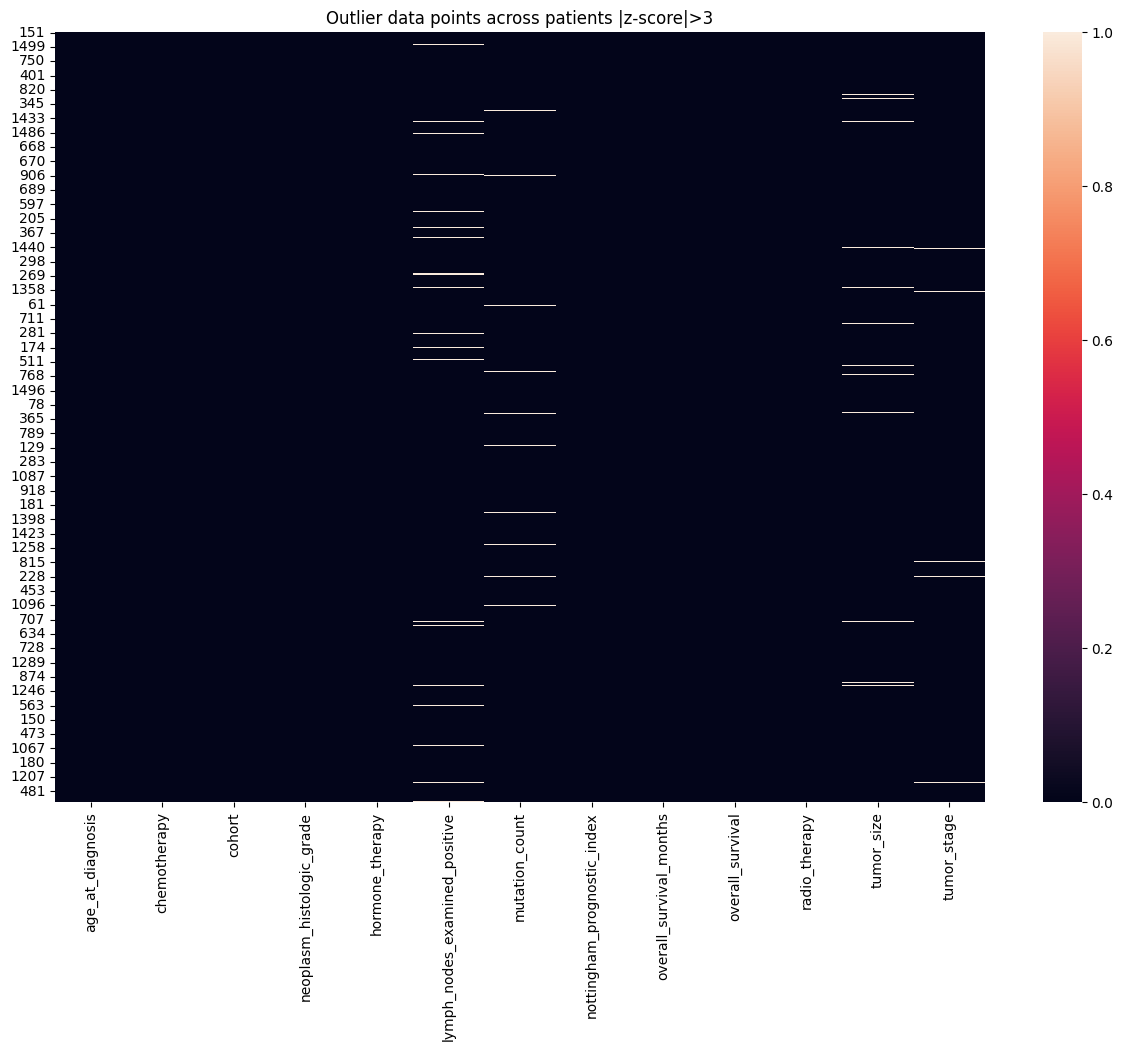

In [ ]:
fig, axs = plt.subplots(figsize = (15, 10))
sns.heatmap(num_zscores_binary)
plt.title('Outlier data points across patients |z-score|>3')
plt.show()

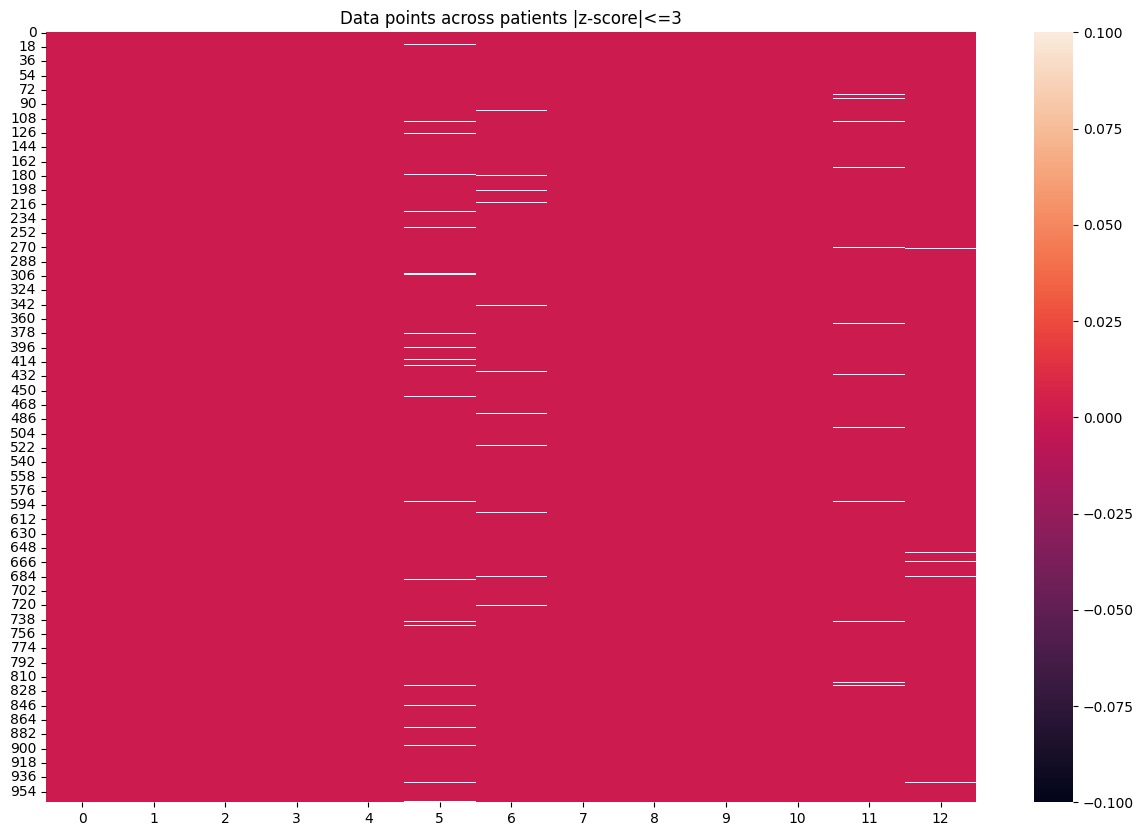

In [ ]:
# Calculate the z-score of each data point
z_scores = np.abs((num_zscores_binary - np.mean(num_zscores_binary)) / np.std(num_zscores_binary))

# Filter out any data points with a z-score greater than 3
num_zscores_binary_filtered = np.where(z_scores > 3, np.nan, num_zscores_binary)

# Create the heatmap of the filtered dataset
fig, axs = plt.subplots(figsize = (15, 10))
sns.heatmap(num_zscores_binary_filtered)
plt.title('Data points across patients |z-score|<=3')
plt.show()

In [ ]:
def performanceResults(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
        if y_hat[i] == 1 and y_actual[i] != y_hat[i]:
            FP += 1
        if y_actual[i] == y_hat[i] == 0:
            TN += 1
        if y_hat[i] == 0 and y_actual[i] != y_hat[i]:
            FN += 1
    acc = (TP + TN) / (TP + FP + TN + FN)

    print ('accuracy: ', acc)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y = new_data['overall_survival'].values
data = new_data.drop(['overall_survival'], axis=1)

numericalFeats = data.select_dtypes('number').columns
categoricalFeats = data.select_dtypes('object').columns

# Split Numeric and Categorical Tables
catdata = data[categoricalFeats]
numdata = data[numericalFeats]


# Scale Numerical Table
numdata_scaled = preprocessing.scale(numdata)

# One-hot Encode Categorical Table
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(catdata)
catendata = encoder.transform(catdata).toarray()

# Combine Features
X = np.concatenate((numdata_scaled, catendata), axis=1)

# Separate Train and Testing Data
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=42)

Logistic Regression

In [ ]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train, y_train)
y_pred_LR = clf_LR.predict(X_test)
PR_LR = performanceResults(y_test, y_pred_LR)
print(PR_LR)

accuracy:  1.0
None


Support Vector Machine

In [ ]:
clf_SVM = SVC()
clf_SVM.fit(X_train, y_train)
y_pred_SVM = clf_SVM.predict(X_test)
PR_SVM = performanceResults(y_test, y_pred_SVM)
print(PR_SVM)

accuracy:  1.0
None


Random Forest

In [ ]:
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_test)
PR_RF = performanceResults(y_test, y_pred_RF)
print(PR_RF)

accuracy:  1.0
None


Decision Tree

In [ ]:
clf_DT = DecisionTreeClassifier()
clf_DT.fit(X_train, y_train)
y_pred_DT = clf_DT.predict(X_test)
PR_DT = performanceResults(y_test, y_pred_DT)
print(PR_DT)

accuracy:  1.0
None


**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score
LR_scores = cross_val_score(clf_LR, X_train, y_train, cv=5)
print("'Cross-validated Accuracy LR :' %0.4f (+/- %0.4f)" % (LR_scores.mean(), LR_scores.std()))

DT_scores = cross_val_score(clf_DT, X_train, y_train, cv=5)
print("'Cross-validated Accuracy DT :' %0.4f (+/- %0.4f)" % (DT_scores.mean(), DT_scores.std()))

SVM_scores = cross_val_score(clf_SVM, X_train, y_train, cv=5)
print("'Cross-validated Accuracy SVM :' %0.4f (+/- %0.4f)" % (SVM_scores.mean(), SVM_scores.std()))

RF_scores = cross_val_score(clf_RF, X_train, y_train, cv=5)
print("'Cross-validated Accuracy RF :' %0.4f (+/- %0.4f)" % (RF_scores.mean(), RF_scores.std()))


'Cross-validated Accuracy LR :' 1.0000 (+/- 0.0000)
'Cross-validated Accuracy DT :' 1.0000 (+/- 0.0000)
'Cross-validated Accuracy SVM :' 0.9971 (+/- 0.0059)
'Cross-validated Accuracy RF :' 1.0000 (+/- 0.0000)


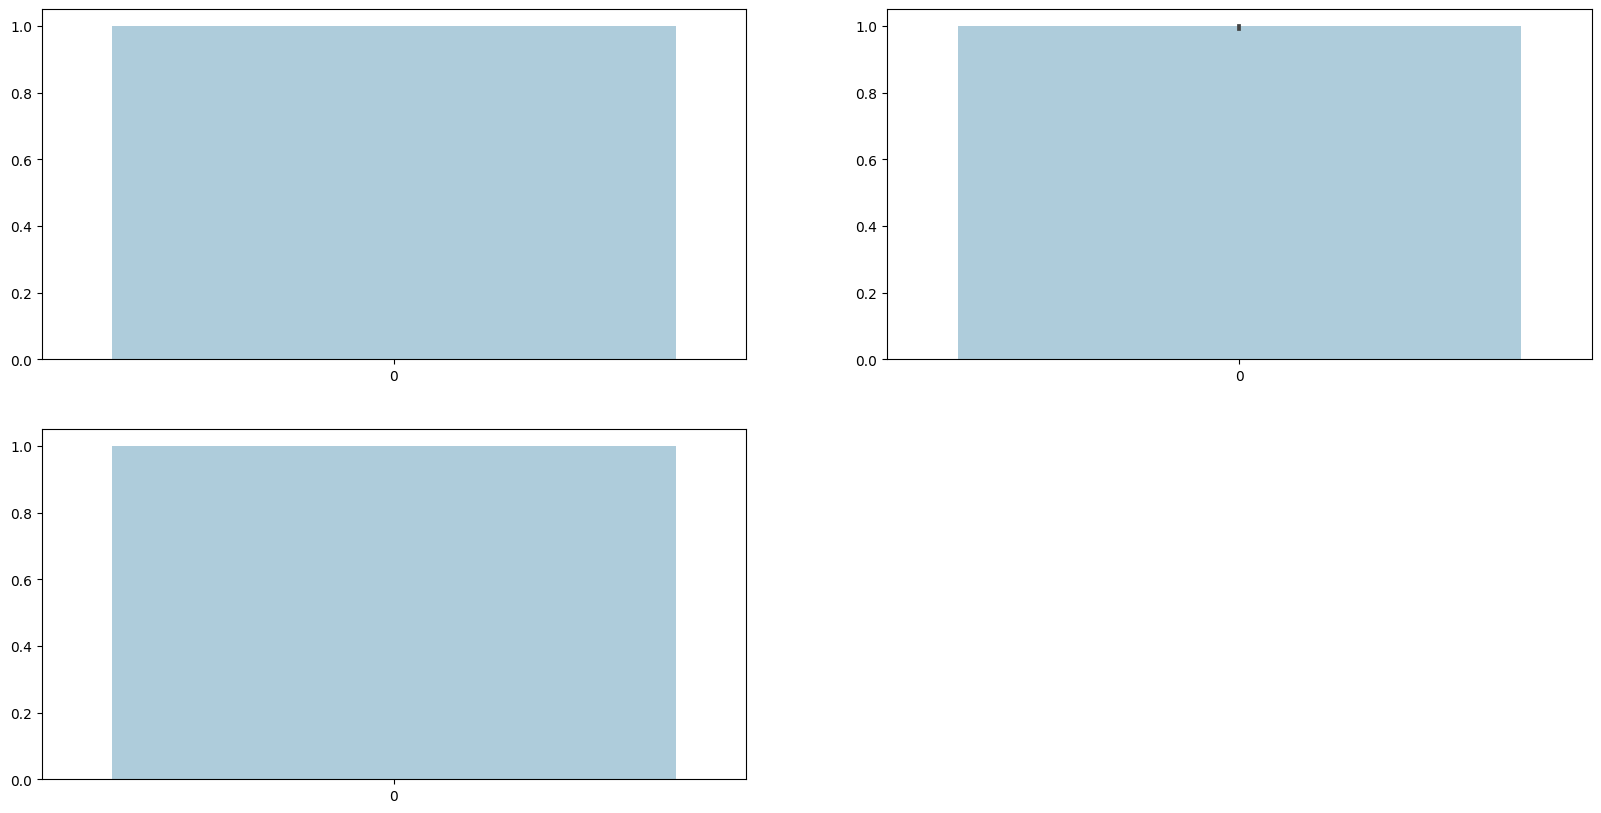

In [ ]:
f, axes = plt.subplots(2,2, figsize=(20,10))

sns.barplot(cross_val_score(clf_LR, X_train, y_train, cv=5), palette="Paired", ax=axes[0][0])
sns.barplot(cross_val_score(clf_SVM, X_train, y_train, cv=5), palette="Paired", ax=axes[0][1])
sns.barplot(cross_val_score(clf_RF, X_train, y_train, cv=5), palette="Paired", ax=axes[1][0])
sns.barplot(cross_val_score(clf_DT, X_train, y_train, cv=5), palette="Paired", ax=axes[0][1])


axes[1,1].set_axis_off()

**LEARNING CURVE**

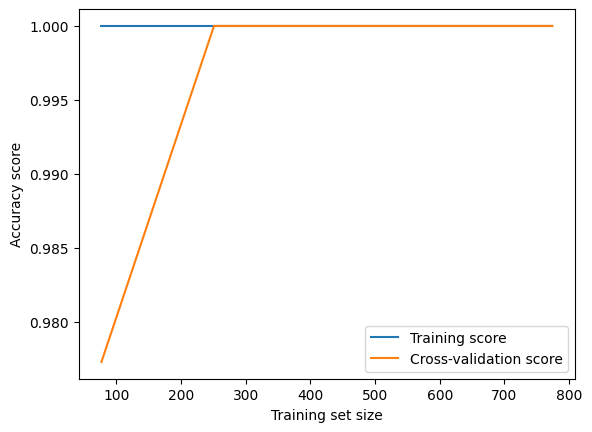

In [ ]:
from sklearn.model_selection import learning_curve


# estimator = model, X = feature matrix, y = target vector
estimator=clf_LR
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5)

# plot the learning curve using matplotlib
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Confusion Matrix of Logistic regression
[[150   0]
 [  0 141]]


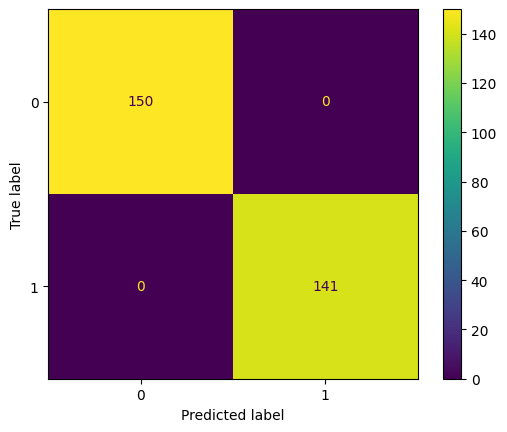

In [ ]:
print("Confusion Matrix of Logistic regression")
cm_LR = confusion_matrix(y_test, y_pred_LR)
print(cm_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR)

plt.show()
disp.plot()


Confusion Matrix of SVM
[[150   0]
 [  0 141]]


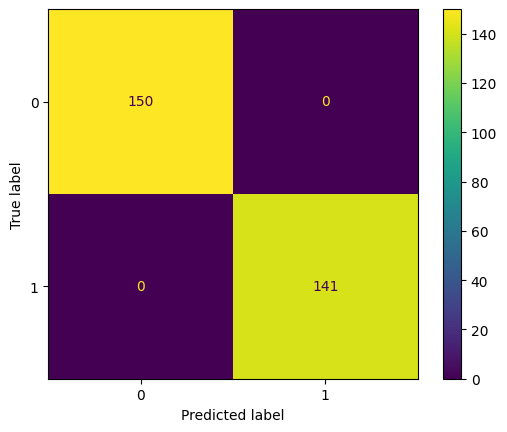

In [ ]:
print("Confusion Matrix of SVM")
cm_SVM=confusion_matrix(y_test, y_pred_SVM)
print(cm_SVM)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)

plt.show()
disp1.plot()


Confusion Matrix of SVM
[[150   0]
 [  0 141]]


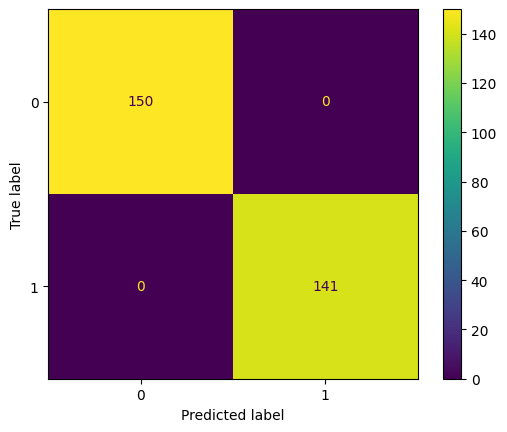

In [ ]:
print("Confusion Matrix of SVM")
cm_RF=confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_RF)

plt.show()
disp3.plot()

Confusion Matrix of SVM
[[150   0]
 [  0 141]]


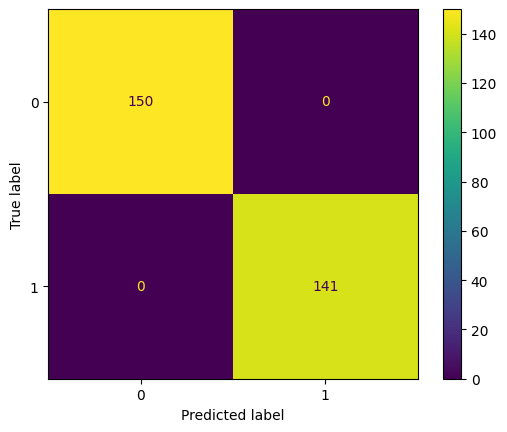

In [ ]:
print("Confusion Matrix of SVM")
cm_DT=confusion_matrix(y_test, y_pred_DT)
print(cm_DT)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_DT)

plt.show()
disp4.plot()

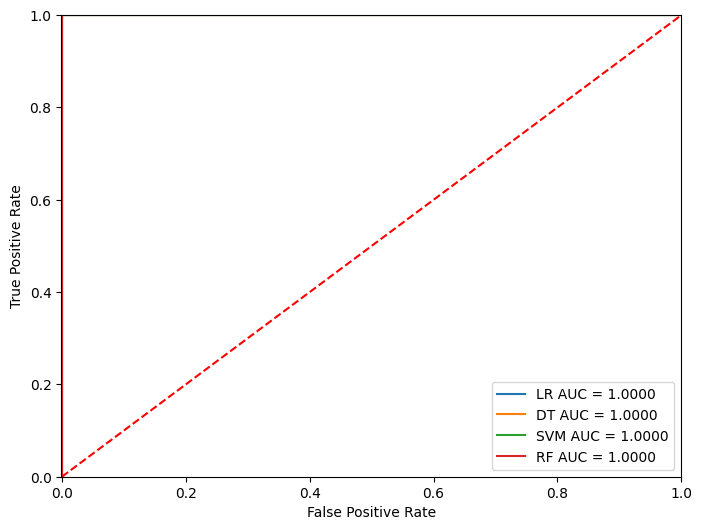

In [ ]:
# Plot ROC
fig, axs = plt.subplots(figsize = (8, 6))

(lrfpr, lrtpr, lrthresholds) = metrics.roc_curve(y_test, y_pred_LR)
lrroc_auc = metrics.auc(lrfpr, lrtpr)
plt.plot(lrfpr, lrtpr, label='LR AUC = %0.4f' % lrroc_auc)

(dtfpr, dttpr, dtthresholds) = metrics.roc_curve(y_test, y_pred_DT)
dtroc_auc = metrics.auc(dtfpr, dttpr)
plt.plot(dtfpr, dttpr, label='DT AUC = %0.4f' % dtroc_auc)

(svmfpr, svmtpr, svmthresholds) = metrics.roc_curve(y_test, y_pred_SVM)
svmroc_auc = metrics.auc(svmfpr, svmtpr)
plt.plot(svmfpr, svmtpr, label='SVM AUC = %0.4f' % svmroc_auc)

(rffpr, rftpr, rfthresholds) = metrics.roc_curve(y_test, y_pred_RF)
rfroc_auc = metrics.auc(rffpr, rftpr)
plt.plot(rffpr, rftpr, label='RF AUC = %0.4f' % rfroc_auc)

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()